## Final Project Submission

In [3]:
#import all the necessary modules
from bs4 import BeautifulSoup
import requests as rq
import pandas as pd
import numpy as np

In [ ]:
#Webscrape boxofficemojo for films' box office sales
dataframes =[]
#for loop to scrape the websites pages from year 2000-2019
for i in range(2000,2020):
    url = 'https://www.boxofficemojo.com/year/world/{}/'.format(i)
    r = rq.get(url)
    #create beautifulsoup object out of html
    p = BeautifulSoup(r.text, 'html.parser')
    #find all the movie titles on the page by tag and class
    movie_titles = p.find_all('a', class_='a-link-normal')
    titles = []
    #append each movie title to a list
    for movie in movie_titles:
        titles.append(movie.text)
    #remove extraneous lines from the list
    domestic_titles=titles[17:-11]
    #create dataframe of titles
    titles_df = pd.DataFrame(domestic_titles)
    #find all the movie sales on the page by tag and class
    movie_gross = p.find_all('td', class_='a-text-right mojo-field-type-money')
    worldwide_gross = []
    #append each movie gross to a list
    for movie in movie_gross:
        worldwide_gross.append(movie.text)
    #skip every two lines in the list (unwanted data)
    domestic_gross = worldwide_gross[1::3]
    #make dataframe of gross
    dom_gross_df = pd.DataFrame(domestic_gross)
    #add column with the year
    dom_gross_df['Year']=i
    #combine the two dataframes
    tables = [titles_df.T, dom_gross_df]
    result = pd.concat(tables, axis=1)
    #append dfs to a list
    dataframes.append(result)

In [22]:
#concatinate all the years dfs into one df
df=pd.concat(dataframes)

In [23]:
#set column names
df.columns = ['title', 'Domestic Gross', 'Year']

In [27]:
df.reset_index(drop=True, inplace=True)

In [32]:
#imported csv from partner with df of bechdel test data
bech_df = pd.read_csv('module1mediaproject_export_dataframe.csv')

In [36]:
#inner join box office sales df and bechdel df on column 'title'
bech_gross_df = df.merge(bech_df, on="title", how = 'inner')

In [38]:
bech_gross_df.nunique()

title             2409
Domestic Gross    2452
Year                20
year                20
rating               2
id                2441
imdbid            2439
dtype: int64

In [50]:
#drop any duplicate movies
bech_gross_df.drop_duplicates(subset=['title'], keep='first', inplace=True)

In [41]:
#check for any NaNs
bech_gross_df['title'].isna().sum()

0

In [46]:
#check for any movies with gross of '-' meaning no input
empty = 0
for movie in bech_gross_df['Domestic Gross']:
    if movie == '-':
        empty+=1
empty

36

In [52]:
#remove rows with '-' as value
df_clean1 = bech_gross_df[bech_gross_df['Domestic Gross'] != '-']

In [54]:
df_clean1.reset_index(drop=True,inplace=True)

In [56]:
#remove residual year column from imported df
del df_clean1['year']

In [68]:
df_clean1['rating'].describe()

count    2374.000000
mean        0.593934
std         0.491201
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: rating, dtype: float64

In [59]:
#import visualization module
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
#exporting df to csv for partners use
df_clean1.to_csv('df_clean_to_csv2.csv')

In [95]:
#cleaning gross values
df_clean1['Domestic Gross'] = df_clean1['Domestic Gross'].map(lambda x: x.lstrip('$').replace(',',''))

/Users/brendonius/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
#converting gross values from string to numeric
df_clean1['Domestic Gross']= pd.to_numeric(df_clean1['Domestic Gross'])

/Users/brendonius/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
#df for movies that pass Bechdel test
movie_pass=df_clean1[df_clean1['rating']==1]

In [106]:
movie_pass.median

,title,Domestic Gross,Year,rating,id,imdbid
4,Dinosaur,137748063,2000,1,7188,130623
5,How the Grinch Stole Christmas,260044825,2000,1,7928,170016
8,What Lies Beneath,155464351,2000,1,1071,161081
9,Scary Movie,157019771,2000,1,5544,175142
10,Erin Brockovich,125595205,2000,1,452,195685
...,...,...,...,...,...,...
2369,Sword of Trust,322421,2019,1,8805,8484012
2370,Her Smell,255599,2019,1,8940,7942742
2371,American Woman,236637,2019,1,8647,9109492
2372,Little Joe,23862,2019,1,8967,9204204


In [107]:
movie_pass['Domestic Gross'].describe()

count    1.410000e+03
mean     4.747980e+07
std      8.474295e+07
min      3.830000e+02
25%      6.110460e+05
50%      1.419602e+07
75%      5.639969e+07
max      8.583730e+08
Name: Domestic Gross, dtype: float64

In [108]:
#df for movies that dont pass Bechdel test
movie_nopass=df_clean1[df_clean1['rating']==0]

In [110]:
movie_nopass['Domestic Gross'].describe()

count    9.640000e+02
mean     4.954410e+07
std      7.118637e+07
min      1.810000e+03
25%      1.117783e+06
50%      2.275889e+07
75%      6.723078e+07
max      7.497661e+08
Name: Domestic Gross, dtype: float64

In [252]:
y2=movie_pass.groupby('Year')['Domestic Gross'].mean()

In [144]:
y2.reset_index(drop=True, inplace=True)

In [145]:
y2

0     6.411823e+07
1     3.232767e+07
2     4.521641e+07
3     4.006201e+07
4     4.045108e+07
5     3.682599e+07
6     3.282521e+07
7     4.400166e+07
8     3.821812e+07
9     4.066419e+07
10    5.005714e+07
11    3.873339e+07
12    3.114154e+07
13    3.975002e+07
14    4.071165e+07
15    5.809345e+07
16    5.420238e+07
17    7.150391e+07
18    8.579211e+07
19    8.968512e+07
Name: Domestic Gross, dtype: float64

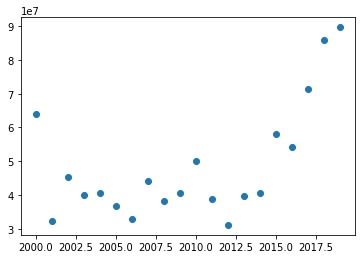

In [167]:
plt.scatter(movie_pass['Year'].unique(), y2)

In [155]:
y3=movie_nopass.groupby('Year')['Domestic Gross'].mean()
y3.reset_index(drop=True, inplace=True)

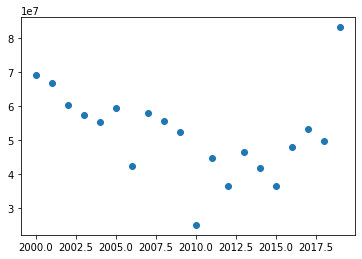

In [166]:
plt.scatter(movie_pass['Year'].unique(), y3)

In [172]:
movie_pass.groupby('Year')['rating'].count()

Year
2000    32
2001    56
2002    53
2003    62
2004    62
2005    61
2006    73
2007    75
2008    60
2009    57
2010    86
2011    93
2012    97
2013    93
2014    94
2015    79
2016    90
2017    71
2018    66
2019    50
Name: rating, dtype: int64

In [173]:
movie_nopass.groupby('Year')['rating'].count()

Year
2000    30
2001    35
2002    52
2003    39
2004    36
2005    51
2006    46
2007    46
2008    59
2009    65
2010    57
2011    73
2012    55
2013    59
2014    64
2015    63
2016    47
2017    36
2018    32
2019    19
Name: rating, dtype: int64

([<matplotlib.axis.XTick at 0x12e6b0150>,
 <a list of 11 Text xticklabel objects>)

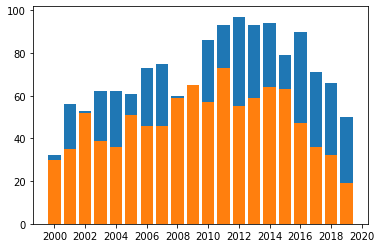

In [198]:
#create bar graph of pass/no pass over past 19. years
plt.bar(movie_pass['Year'].unique(), movie_pass.groupby('Year')['rating'].count())
plt.bar(movie_pass['Year'].unique(), movie_nopass.groupby('Year')['rating'].count())
xtic=[2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020]
plt.xticks(xtic)

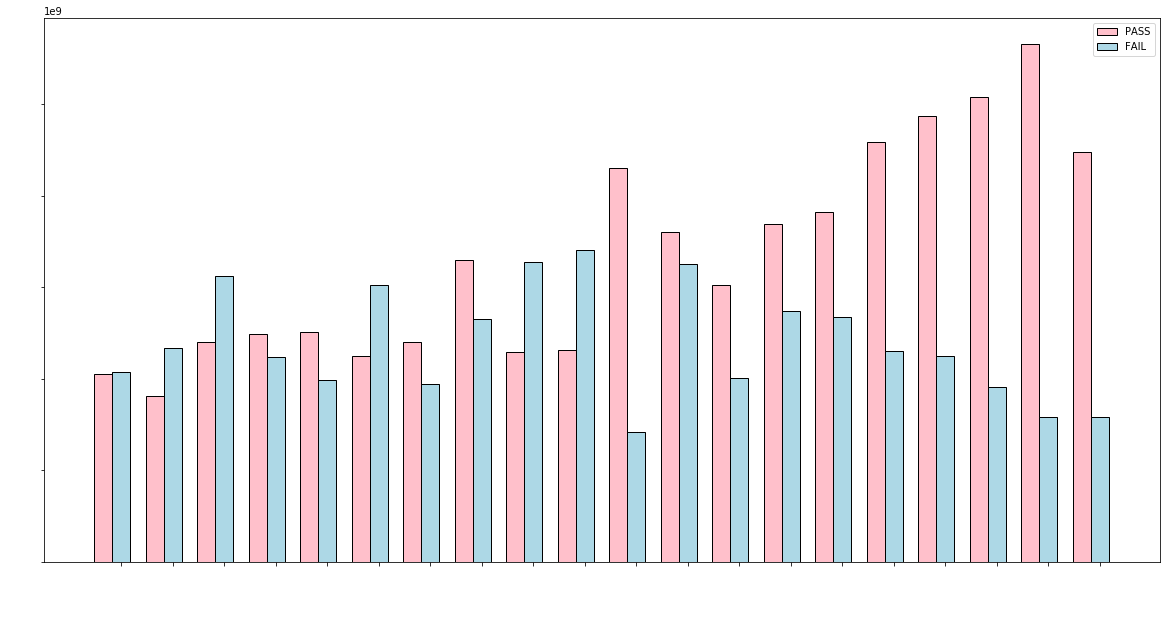

In [253]:
#create figure and add subplot
new_fig = plt.figure(figsize=(20,10))
ax=new_fig.add_subplot(111)

# setting width of bars
barWidth = 0.35
 
# setting height of bar
passbar = movie_pass.groupby('Year')['Domestic Gross'].sum()
nopassbar = movie_nopass.groupby('Year')['Domestic Gross'].sum()
 
# Positioning bars on x axis
r1 = np.arange(len(passbar))
r2 = [x + barWidth for x in r1]
 
# Make the plot
ax.bar(r1, passbar, color='pink', width=barWidth, edgecolor='black', label='PASS')
ax.bar(r2, nopassbar, color='lightblue', width=barWidth, edgecolor='black', label='FAIL')
 
# Add xticks and yticks and label the axes
plt.ylabel('Sum of U.S. Box Office Gross in Billions',fontsize= '20', fontweight='bold', color='white')
plt.xlabel('Release Year', fontsize= '20', fontweight='bold', color='white')
plt.xticks([w + barWidth for w in range(len(passbar))], ['2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014','2015', '2016', '2017', '2018', '2019'],rotation=90, fontsize='15', color='white')
plt.yticks(color='white')

# Create legend & Show graphic
plt.legend()
plt.show()

In [289]:
#sort movies from highest grossing to lowest
movie_pass.sort_values(['Domestic Gross'], ascending=False, inplace=True)

/Users/brendonius/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [343]:
#create groupby object with the top ten grossers from each year
df5 = movie_pass.groupby('Year')['Domestic Gross'].nlargest(10).reset_index(drop=True)

In [379]:
#create a variable for each years top ten mean
toptenmean00p = df5[0:10].mean()
toptenmean01p = df5[10:20].mean()
toptenmean02p = df5[20:30].mean()
toptenmean03p = df5[30:40].mean()
toptenmean04p = df5[40:50].mean()
toptenmean05p = df5[50:60].mean()
toptenmean06p = df5[60:70].mean()
toptenmean07p = df5[70:80].mean()
toptenmean08p = df5[80:90].mean()
toptenmean09p = df5[90:100].mean()
toptenmean10p = df5[100:110].mean()
toptenmean11p = df5[110:120].mean()
toptenmean12p = df5[120:130].mean()
toptenmean13p = df5[130:140].mean()
toptenmean14p = df5[140:150].mean()
toptenmean15p = df5[150:160].mean()
toptenmean16p = df5[160:170].mean()
toptenmean17p = df5[170:180].mean()
toptenmean18p = df5[180:190].mean()
toptenmean19p = df5[190:200].mean()

In [386]:
toptenmean00p

137842809.7

In [387]:
toptenmean00n

145870630.6

In [360]:
movie_nopass.sort_values(['Domestic Gross'], ascending=False, inplace=True)

/Users/brendonius/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [378]:
df6 = movie_nopass.groupby('Year')['Domestic Gross'].nlargest(10).reset_index(drop=True)

In [382]:
toptenmean00n = df6[0:10].mean()
toptenmean01n = df6[10:20].mean()
toptenmean02n = df6[20:30].mean()
toptenmean03n = df6[30:40].mean()
toptenmean04n = df6[40:50].mean()
toptenmean05n = df6[50:60].mean()
toptenmean06n = df6[60:70].mean()
toptenmean07n = df6[70:80].mean()
toptenmean08n = df6[80:90].mean()
toptenmean09n = df6[90:100].mean()
toptenmean10n = df6[100:110].mean()
toptenmean11n = df6[110:120].mean()
toptenmean12n = df6[120:130].mean()
toptenmean13n = df6[130:140].mean()
toptenmean14n = df6[140:150].mean()
toptenmean15n = df6[150:160].mean()
toptenmean16n = df6[160:170].mean()
toptenmean17n = df6[170:180].mean()
toptenmean18n = df6[180:190].mean()
toptenmean19n = df6[190:200].mean()

In [388]:
top_n_mean=[toptenmean00n,toptenmean01n,toptenmean02n,toptenmean03n,toptenmean04n,toptenmean05n,toptenmean06n,toptenmean07n,
toptenmean08n,toptenmean09n,toptenmean10n,toptenmean11n,toptenmean12n,toptenmean13n,toptenmean14n,toptenmean15n,toptenmean16n,
            toptenmean17n,toptenmean18n,toptenmean19n]
top_p_mean= [toptenmean00p,toptenmean01p,toptenmean02p,toptenmean03p,toptenmean04p,toptenmean05p,toptenmean06p,
toptenmean07p,toptenmean08p,toptenmean09p,toptenmean10p,toptenmean11p,toptenmean12p,toptenmean13p,toptenmean14p,
toptenmean15p,toptenmean16p,toptenmean17p,toptenmean18p,toptenmean19p]

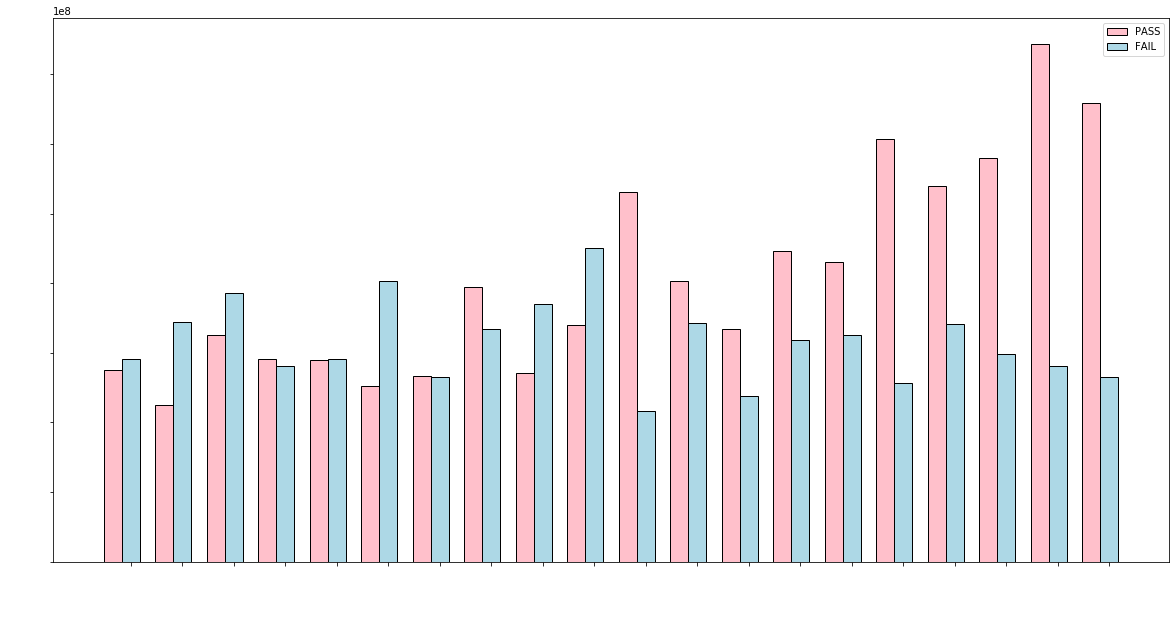

In [392]:
#create figure and add subplot
new_fig2 = plt.figure(figsize=(20,10))
ax2=new_fig2.add_subplot(111)

# setting width of bars
barWidth = 0.35
 
# setting height of bar
passbar = top_p_mean
nopassbar = top_n_mean
 
# Positioning bars on x axis
r1 = np.arange(len(passbar))
r2 = [x + barWidth for x in r1]
 
# Make the plot
ax2.bar(r1, passbar, color='pink', width=barWidth, edgecolor='black', label='PASS')
ax2.bar(r2, nopassbar, color='lightblue', width=barWidth, edgecolor='black', label='FAIL')
 
# Add xticks and yticks and label the axes
plt.ylabel('Mean Sales in Millions',fontsize= '20', fontweight='bold', color='white')
plt.xlabel('Release Year', fontsize= '20', fontweight='bold', color='white')
plt.xticks([w + barWidth for w in range(len(passbar))], ['2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014','2015', '2016', '2017', '2018', '2019'],rotation=90, fontsize='15', color='white')
plt.yticks(color='white')

# Create legend & Show graphic
plt.legend()
plt.show()